## What is a query? 

One of the most powerful aspects of MuSpAn is its ```query``` module. This allows the user the user to select specific objects within the domain according to some desired criteria, extract those objects, and perform actions on them (such as detailed spatial analyses, plotting, and so on). This is particularly useful when a domain contains many different objects, but we want to focus our analysis on some subset of them.

Let's load an example region to demonstrate this. We'll use a standard demonstration dataset, the [Xenium mouse colon data from 10x](https://www.10xgenomics.com/datasets/fresh-frozen-mouse-colon-with-xenium-multimodal-cell-segmentation-1-standard). A region from this dataset is available as an example domain in MuSpAn, the 'Xenium-Healthy-Colon':

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x600 with 2 Axes>, <Axes: >)

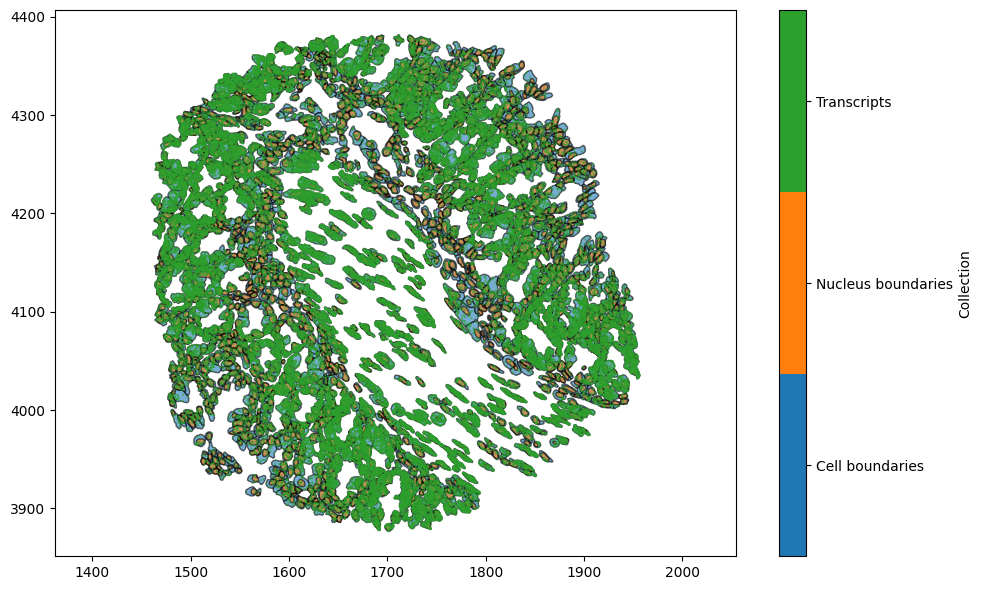

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

# Load the example domain 'Xenium-Healthy-Colon'
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Visualise the domain with a specified marker size
ms.visualise.visualise(domain, ax=plt.gca(), marker_size=0.1)

This visualisation isn't all that helpful - there are over 74,000 objects in this domain, which makes visualisation clunky. Let's use the ```objects_to_plot``` argument of ```visualise```, so that we only plot a small number of objects.

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

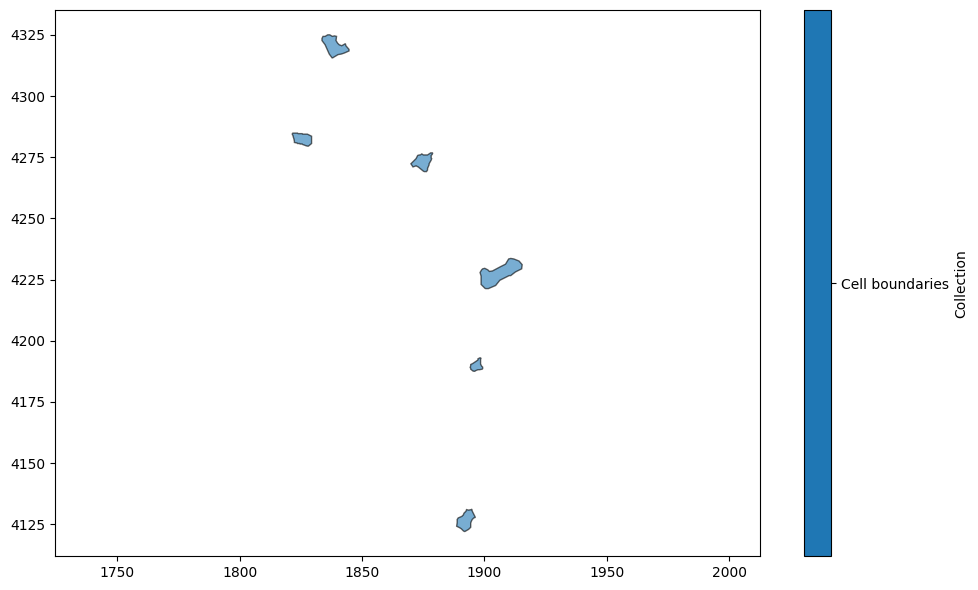

In [2]:
# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Visualise the domain, plotting only specific objects with given IDs
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=[0, 12, 32, 46, 111, 128])

```objects_to_plot``` tells ```visualise``` which specific objects to plot - in this, the objects with IDs 0, 12, 32, 46, 111, and 128. This isn't all that helpful in this situation. What we'd really like is to get the IDs of every object that is, for example, a cell boundary, and to plot all of those.

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

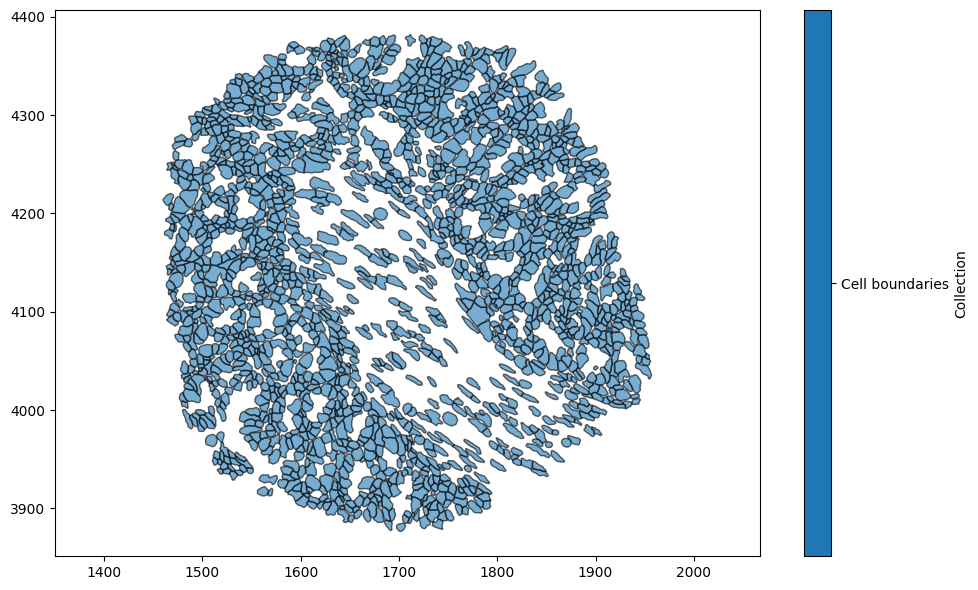

In [3]:
# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Visualise the domain, plotting only objects that are in the 'Cell boundaries' collection
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=('Collection', 'Cell boundaries'))

Behind the scenes, a little bit of magic has just taken place. The ```objects_to_plot``` argument of ```visualise``` is really looking for a list of object IDs, which will tell ```visualise``` which ones to draw. Instead of passing it a list of integers, we've instead passed a tuple, ```('Collection','Cell boundaries')```, that MuSpAn has converted into a list of IDs behind the scenes. This tuple is "query-like", MuSpAn terminology for an argument that can be interpreted by the domain as a list of object IDs. This particular tuple is interpreted by MuSpAn as a request for any objects which match the criteria "Object is in the collection called 'Cell boundaries'".

This type of tuple can also be used to isolate, for example, objects with a certain label. Let's plot only objects with the "Cluster ID" label equal to "Cluster 2".

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

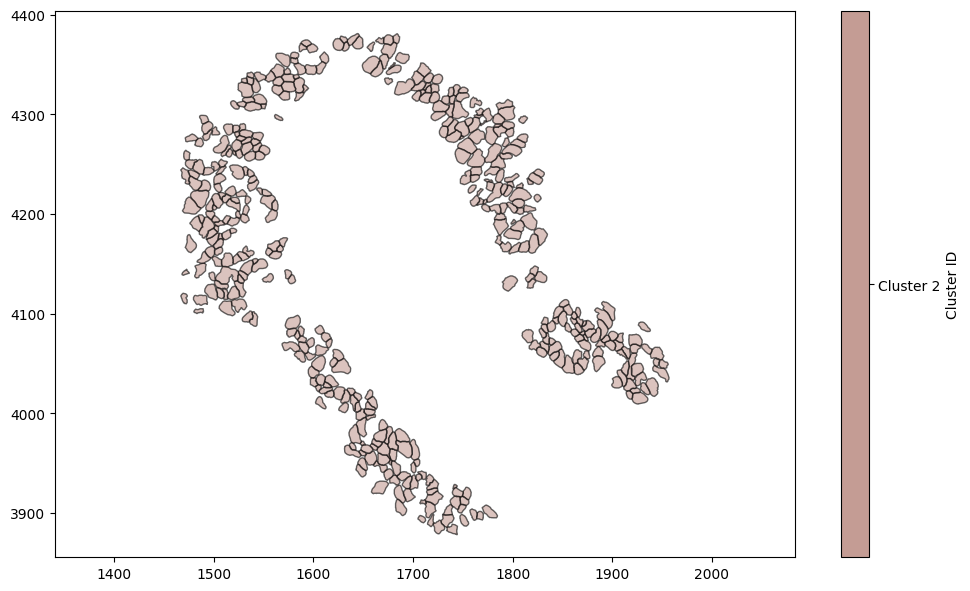

In [4]:
# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Visualise the domain, plotting only objects with 'Cluster ID' equal to 'Cluster 2'
# and color the objects by their 'Cluster ID'
ms.visualise.visualise(
    domain,
    ax=plt.gca(),
    objects_to_plot=('Cluster ID', 'Cluster 2'),
    color_by='Cluster ID'
)

This example has given a brief overview of queries in MuSpAn - the key thing to understand is that a query is something that can be interpreted by MuSpAn as a list of object IDs. In this example, we've seen how a simple tuple of two strings can do this. 

However, understanding and mastering more complex queries can be key to unlocking extremely complex analyses. In the other tutorials in this section, we show how more complex queries can be developed and understood.